In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [5]:
pd.DataFrame({'Yes':[50,21],'No':[131,2]})

Yes   No
0   50  131
1   21    2

In [6]:
pd.Series([1,2,3,4,5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [7]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

In [18]:
reddit = pd.read_csv("./input/r_dataisbeautiful_posts.csv",low_memory=True)

In [19]:
reddit.shape #(records,columns)

(167731, 12)

In [144]:
reddit.head()#grabs the first five rows.

id                                              title  score  \
0  flydw4  Two arrested after botched 'Islamist attack' s...      1   
1  fly9me  [OC] LinkedIn hiring data shows a "rolling bla...      1   
2  fly7e7  Check out this site I made to help track how m...      1   
3  fly6mw  See the Disgusting Market In Wuhan Where This ...      1   
4  fly2yu                          Click here to continue...      1   

         author author_flair_text removed_by  total_awards_received awarders  \
0  hornedviper9               NaN     reddit                    0.0       []   
1         brixu               NaN        NaN                    0.0       []   
2  peachteaboba               NaN        NaN                    0.0       []   
3  hornedviper9               NaN     reddit                    0.0       []   
4        iaad99               NaN     reddit                    0.0       []   

   created_utc                                          full_link  \
0   1584723353  https://www.reddit.com/r/dataisbeautiful/comme...   
1   1584722940  https://www.reddit.com/r/dataisbeautiful/comme...   
2   1584722714  https://www.reddit.com/r/dataisbeautiful/comme...   
3   1584722643  https://www.reddit.com/r/dataisbeautiful/comme...   
4   1584722292  https://www.reddit.com/r/dataisbeautiful/comme...   

   num_comments  over_18  
0             0    False  
1             0    False  
2             2    False  
3             0    False  
4             0    False

In [72]:
reddit.tail();

In [73]:
reddit["title"][1];

In [37]:
reddit.iloc[:10,1] #[row,column] index-based

0    Two arrested after botched 'Islamist attack' s...
1    [OC] LinkedIn hiring data shows a "rolling bla...
2    Check out this site I made to help track how m...
3    See the Disgusting Market In Wuhan Where This ...
4                            Click here to continue...
5     Web Searches Regarding Hand Washing in 2020 [OC]
6    [OC] In 2019 I kept track of a simple mood log...
7    The Coronavirus Is Not Causing Deaths—Weak Imm...
8                 [OC] Covid-19 Cases vs Deaths in USA
9                      Covid-19 Deaths vs Cases in USA
Name: title, dtype: object

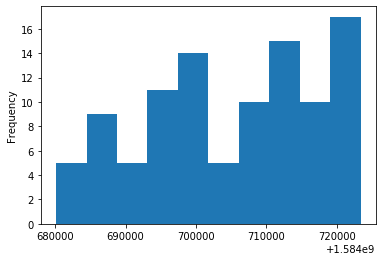

In [85]:
df = reddit.loc[:5,'title'] #label-based
df2 = reddit.loc[:100,'created_utc']
df2.plot.hist()

In [89]:
reddit[reddit['score']==0];

In [115]:
corona = reddit[reddit['title'].str.contains("coronavirus") == True]
corona.shape
corona.head()
corona.describe()

score  total_awards_received   created_utc  num_comments
count  270.000000                  269.0  2.700000e+02    270.000000
mean     1.070370                    0.0  1.582400e+09     28.181481
std      1.055457                    0.0  9.063515e+06    145.907825
min      0.000000                    0.0  1.436190e+09      0.000000
25%      1.000000                    0.0  1.581361e+09      1.000000
50%      1.000000                    0.0  1.583518e+09      2.000000
75%      1.000000                    0.0  1.584248e+09      5.000000
max     18.000000                    0.0  1.584723e+09   1608.000000

In [116]:
corona['title'].describe()

count                                                   270
unique                                                  249
top       These simulations show how to flatten the coro...
freq                                                      4
Name: title, dtype: object

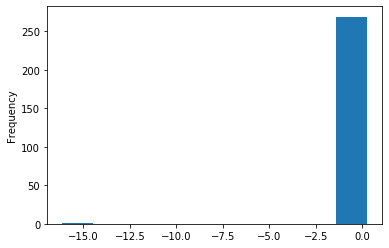

In [135]:
date_mean = corona.created_utc.mean()
date_std = corona.created_utc.std()
z_score = corona.created_utc.map(lambda p: (p - date_mean)/date_std) #map and lambda function.
z_score.plot.hist()

In [139]:
z_score.sort_values()

130966   -16.131731
6876      -0.301884
6613      -0.271744
6609      -0.271572
6608      -0.271493
            ...    
69         0.253672
40         0.255066
18         0.255799
17         0.255835
1          0.256302
Name: created_utc, Length: 270, dtype: float64

In [141]:
z_score.dtype

dtype('float64')

In [142]:
z_score.astype('int64')

1          0
17         0
18         0
40         0
69         0
          ..
6608       0
6609       0
6613       0
6876       0
130966   -16
Name: created_utc, Length: 270, dtype: int64

In [174]:
reddit[pd.isnull(reddit.total_awards_received)];

In [173]:
reddit.total_awards_received.fillna("0");

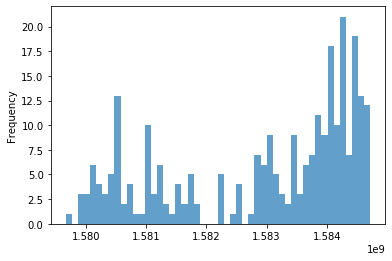

In [231]:
dfDates = corona.created_utc[corona.created_utc>1.5e9]
dfDates.plot.hist(bins = 50, alpha = 0.7)

In [232]:
datetime.datetime.fromtimestamp(1584718707).strftime('%Y-%m-%d %H:%M:%S')

'2020-03-20 11:38:27'

In [233]:
dfDates.map(lambda p: datetime.datetime.fromtimestamp(p).strftime('%Y-%m-%d %H:%M:%S'))

1       2020-03-20 12:49:00
17      2020-03-20 11:38:27
18      2020-03-20 11:32:53
40      2020-03-20 09:42:17
69      2020-03-20 06:11:38
               ...         
6565    2020-01-25 14:44:35
6608    2020-01-25 03:01:02
6609    2020-01-25 02:49:05
6613    2020-01-25 02:23:06
6876    2020-01-21 22:30:09
Name: created_utc, Length: 269, dtype: object

In [251]:
reddit.iloc[dfDates.index[-1]]

id                                                                  es65rh
title                    Current confirmed deaths from the novel corona...
score                                                                    1
author                                                          takeonzach
author_flair_text                                                      NaN
removed_by                                                             NaN
total_awards_received                                                    0
awarders                                                                []
created_utc                                                     1579663809
full_link                https://www.reddit.com/r/dataisbeautiful/comme...
num_comments                                                             4
over_18                                                              False
Name: 6876, dtype: object

In [252]:
reddit.iloc[dfDates.index[-1]].full_link

'https://www.reddit.com/r/dataisbeautiful/comments/es65rh/current_confirmed_deaths_from_the_novel/'